In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [37]:
mX = [
        [
            [10, 2, -6],
            [-1, 4, 2],
            [2, 3, 6]
        ],
        [
            [-5, 2, -8],
            [4, -3, -9],
            [-8, -10, 9]
        ],
        [
            [10, -5, 3, 0],
            [3, -9, 2, -2],
            [-8, 0, 17, -4],
            [3, -3, -8, -15]
        ],
]

mY = [
    [17, -4, -12],
    [13, -7, -2],
    [9, 10, -10, -18]
]

In [38]:
def dominant(x):
    x = np.array(x)
    diagonal = np.diag(np.abs(x))
    sumWithDiagonal = np.sum(np.abs(x), axis = 1)
    sumWithoutDiagonal = sumWithDiagonal - diagonal

    if np.all(diagonal > sumWithoutDiagonal):
        return True
    else:
        return False

In [39]:
def seidel(x, y, tol, max):
    x = np.array(x)
    y = np.array(y)
    flag = 0

    diagonal = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)
    xbef = np.zeros(x.shape[0])

    for i in range(len(x)):
        xn = np.array(xbef)
        if flag == 0:
            for j, row in enumerate(x):
                print(f"X{j} = {y[j]}", end=" ")
                for k, ele in enumerate(row):
                    if j != k:
                        print(f" + ({ele} x {k})", end=" ")
                print(f" / {diagonal[j]}")
                flag = 1
        print(f"Iteration: {i}|")
        for j, row in enumerate(x):
            xn[j] = (y[j] + np.dot(row, xn)) / diagonal[j]
            print(f"X{j + 1} = ", end=" ")
            print(format(xn[j], ".9f"), end=" ")
        print("")
        distance = np.sqrt(np.dot(xn - xbef, xn -xbef))
        if distance < tol:
            return True
        xbef = xn
    return false

In [40]:
for i, (x,y) in enumerate(zip(mX, mY)):
    if(dominant(x)):
        print("diagonally dominant")
        print(seidel(x, y, 0.01456, 5))
    else:
        print("not diagonally dominant")

diagonally dominant
X0 = 17  + (-2 x 1)  + (6 x 2)  / 10
X1 = -4  + (1 x 0)  + (-2 x 2)  / 4
X2 = -12  + (-2 x 0)  + (-3 x 1)  / 6
Iteration: 0|
X1 =  1.700000000 X2 =  -0.575000000 X3 =  -2.279166667 
Iteration: 1|
X1 =  0.447500000 X2 =  0.251458333 X3 =  -2.274895833 
Iteration: 2|
X1 =  0.284770833 X2 =  0.208640625 X3 =  -2.199243924 
False
not diagonally dominant
diagonally dominant
X0 = 9  + (5 x 1)  + (-3 x 2)  + (0 x 3)  / 10
X1 = 10  + (-3 x 0)  + (-2 x 2)  + (2 x 3)  / -9
X2 = -10  + (8 x 0)  + (0 x 1)  + (4 x 3)  / 17
X3 = -18  + (-3 x 0)  + (3 x 1)  + (8 x 2)  / -15
Iteration: 0|
X1 =  0.900000000 X2 =  -0.811111111 X3 =  -0.164705882 X4 =  1.630065359 
Iteration: 1|
X1 =  0.543856209 X2 =  -1.328663762 X3 =  0.051241830 X4 =  1.547175018 
Iteration: 2|
X1 =  0.220295570 X2 =  -1.370108852 X3 =  -0.120525610 X4 =  1.582361210 
Iteration: 3|
X1 =  0.251103257 X2 =  -1.405829319 X3 =  -0.097748771 X4 =  1.583519193 
False


In [41]:
lx = [1, 5, 7, 2, 3, 9, 10, 4, 6, 8]
ly = [34, 51, 80, 25, 90, 76, 100, 11, 45, 62]

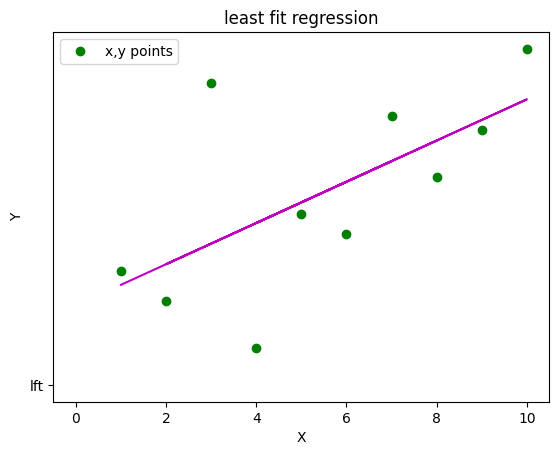

In [42]:
A = np.vstack([lx, np.ones(len(lx))]).T
Y = np.vstack(ly)

invers = np.linalg.inv(np.dot(A.T, A))
beta = np.dot(np.dot(invers, A.T), Y)

m = beta[0]
c = beta[1]

yb = m * lx + c
plt.plot(lx, ly, "go", label="x,y points")
plt.plot(lx, yb, "m-", "lft")
plt.legend(loc = "upper left")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("least fit regression")
plt.show()

In [43]:
x = symbols('x')

f1 = lambda x: 9*x**3 - 5*x**2 + 4
df1 = diff(f1(x), x)
df1 = lambdify(x, df1, 'numpy')

f2 = lambda x: 8*x**5 + 4*x**3 - 3*x**2 - x**2
df2 = diff(f2(x), x)
df2 = lambdify(x, df2, 'numpy')

def nr(f, df, x, tol, max):
    if max == 6:
        return False
    if max > 0:
        print(f"Iteration: {max}, root = {x}")
    if np.abs(f(x)) < tol:
        print(x)
        return True
    return nr(f, df, x -(f(x)/ df(x)), tol, max + 1)
print(nr(f1, df1, 1, 0.01456, 0))
print(nr(f2, df2, 1, 0.01456, 0))

Iteration: 1, root = 0.5294117647058824
Iteration: 2, root = -1.2010923090697458
Iteration: 3, root = -0.832038535544258
Iteration: 4, root = -0.6600591977992907
Iteration: 5, root = -0.6183169238793849
False
Iteration: 1, root = 0.8181818181818181
Iteration: 2, root = 0.6921642005872531
Iteration: 3, root = 0.6196579671463581
Iteration: 4, root = 0.5932125176320585
Iteration: 5, root = 0.5898077033288729
0.5898077033288729
True


In [44]:
f = lambda x: 9*x**3 + 4*x**2 - 8
un = -4
up = 3
n = 30

x = np.linspace(un, up, n)

xl = x[:-1]
xr = x[1:]
xm = (xl + xr) / 2

yl = f(xl)
yr = f(xr)
ym = f(xm)

width = (up - un) / (n - 1)
left = width * np.sum(np.abs(yl))
right = width * np.sum(np.abs(yr))
mid = width * np.sum(np.abs(ym))
trap = width * np.sum(np.abs(yl) + (np.abs(yr))) / 2

print("left: ", left)
print("right: ", right)
print("mid: ", mid)
print("trapezoid: ", trap)

left:  759.6204224346478
right:  699.5169741587857
mid:  725.0383343041875
trapezoid:  729.5686982967165
